# Quantitive Strucure-Activity Relationship (QSAR) modelling
Molecular activity of molecules over the Dopamine2 Receptors



# Data Preparation

In [31]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel

# Model metrics
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, matthews_corrcoef, f1_score, recall_score,explained_variance_score, mean_squared_error, explained_variance_score
from scipy.stats import anderson, shapiro

In [3]:
X_train, X_ivs, y_train, col_names = pickle.load(open("drd2_data.pickle", "rb"))

# Data Preprocessing

In [4]:
# Convert datasets into dataframes to get info about them
X_train_df=pd.DataFrame(X_train)
X_ivs_df=pd.DataFrame(X_ivs)
X_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7337 entries, 0 to 7336
Columns: 2132 entries, 0 to 2131
dtypes: float64(2132)
memory usage: 119.3 MB


In [5]:
#Check there is no null values
null_summary = X_train_df.isnull().any(axis=1)

#Displays the rows with at least one null value
rows_with_null = X_train_df[null_summary]
print(rows_with_null)

Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]
Index: []

[0 rows x 2132 columns]


In [6]:
# Check column names
print(col_names)

['D00', 'D01', 'D02', 'D03', 'D04', 'D05', 'D06', 'D07', 'D08', 'D09', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'D16', 'D17', 'D18', 'D19', 'D20', 'D21', 'D22', 'D23', 'D24', 'D25', 'D26', 'D27', 'D28', 'D29', 'D30', 'D31', 'D32', 'D33', 'D34', 'D35', 'D36', 'D37', 'D38', 'D39', 'D40', 'D41', 'D42', 'FP0000', 'FP0001', 'FP0002', 'FP0003', 'FP0004', 'FP0005', 'FP0006', 'FP0007', 'FP0008', 'FP0009', 'FP0010', 'FP0011', 'FP0012', 'FP0013', 'FP0014', 'FP0015', 'FP0016', 'FP0017', 'FP0018', 'FP0019', 'FP0020', 'FP0021', 'FP0022', 'FP0023', 'FP0024', 'FP0025', 'FP0026', 'FP0027', 'FP0028', 'FP0029', 'FP0030', 'FP0031', 'FP0032', 'FP0033', 'FP0034', 'FP0035', 'FP0036', 'FP0037', 'FP0038', 'FP0039', 'FP0040', 'FP0041', 'FP0042', 'FP0043', 'FP0044', 'FP0045', 'FP0046', 'FP0047', 'FP0048', 'FP0049', 'FP0050', 'FP0051', 'FP0052', 'FP0053', 'FP0054', 'FP0055', 'FP0056', 'FP0057', 'FP0058', 'FP0059', 'FP0060', 'FP0061', 'FP0062', 'FP0063', 'FP0064', 'FP0065', 'FP0066', 'FP0067', 'FP0068', 'FP0069'

In [7]:
#To allow full view of the columns of the dataset
pd.set_option('display.max_columns', None)
X_train_df.describe()

0            1            2            3            4     \
count  7337.000000  7337.000000  7337.000000  7337.000000  7337.000000   
mean    430.518010   431.037078     5.430285     1.206897     6.527327   
std     181.613020   181.757699     4.160569     2.527815     5.983082   
min     135.068414   135.166000     1.000000     0.000000     0.000000   
25%     357.124405   357.429000     4.000000     0.000000     4.000000   
50%     419.107040   419.500000     5.000000     1.000000     6.000000   
75%     472.228141   472.888000     6.000000     1.000000     8.000000   
max    3768.848446  3771.262000    92.000000    47.000000   137.000000   

              5            6            7            8            9     \
count  7337.000000  7337.000000  7337.000000  7337.000000  7337.000000   
mean      1.128799     4.678070    30.497615    59.165190     6.594930   
std       2.218665     2.789156    12.882724    25.749585     4.403703   
min       0.000000     0.000000    10.000000    19.000000     1.000000   
25%       0.000000     3.000000    25.000000    49.000000     5.000000   
50%       1.000000     4.000000    30.000000    57.000000     6.000000   
75%       1.000000     6.000000    33.000000    65.000000     8.000000   
max      42.000000    58.000000   266.000000   527.000000    93.000000   

              10           11           12           13           14    \
count  7337.000000  7337.000000  7337.000000  7337.000000  7337.000000   
mean      0.610740     0.412880     4.157285     2.570806     1.586479   
std       1.362184     0.132115     1.199923     1.018602     0.867549   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.333333     4.000000     2.000000     1.000000   
50%       0.000000     0.400000     4.000000     3.000000     1.000000   
75%       1.000000     0.480000     5.000000     3.000000     2.000000   
max      30.000000     1.000000    14.000000     9.000000    11.000000   

              15           16           17           18           19    \
count  7337.000000  7337.000000  7337.000000  7337.000000  7337.000000   
mean      1.052746     2.006678     0.746899     0.868202     1.259779   
std       0.783258     0.974223     0.814518     0.594819     0.683070   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.000000     1.000000     0.000000     1.000000     1.000000   
50%       1.000000     2.000000     1.000000     1.000000     1.000000   
75%       1.000000     3.000000     1.000000     1.000000     2.000000   
max      11.000000     9.000000     4.000000     7.000000     7.000000   

              20           21           22           23           24    \
count  7337.000000  7337.000000  7337.000000  7337.000000  7337.000000   
mean      0.034074     0.048249     0.682704     0.249421   182.840951   
std       0.181431     0.357754     1.587992     0.615764    74.961926   
min       0.000000     0.000000     0.000000     0.000000    59.499552   
25%       0.000000     0.000000     0.000000     0.000000   152.940004   
50%       0.000000     0.000000     0.000000     0.000000   178.194506   
75%       0.000000     0.000000     1.000000     0.000000   198.927877   
max       1.000000     8.000000    29.000000    10.000000  1542.223628   

              25           26           27           28           29    \
count  7337.000000  7337.000000  7337.000000  7337.000000  7337.000000   
mean     58.256788     4.093037   120.864912    18.221373    11.270109   
std      62.670539     1.400085    48.037139     7.427662     4.561994   
min       3.240000   -10.523160    40.300500     5.593478     3.306776   
25%      35.580000     3.273420   101.437500    15.166474     9.256720   
50%      50.800000     4.074700   117.723700    17.737779    10.962982   
75%      67.350000     4.836300   131.143700    19.856444    12.356276   
max    1365.490000    16.768600   957.020500   150.889493    89.019955   

            

## Feature Selection
### Standardization and Normalization

In [8]:
# Create dataframe with only binary variables
  # probably structural descriptors, such that define the presence or absence
  # of certain substructures or chemical groups
df_binary = X_train_df.iloc[:, 43:2132]
df_binarytest = X_ivs_df.iloc[:, 43:2132]

# Create dataframe with all the other variables
  # probably represent various physicochemical properties of molecules, such as
  # molecular weight, polar surface area etc.
df_numeric = X_train_df.drop(columns=df_binary.columns)
df_numerictest = X_ivs_df.drop(columns=df_binary.columns)

# Normalize numerical variables
scaler = StandardScaler()
df_numeric = pd.DataFrame(scaler.fit_transform(df_numeric))
df_numerictest = pd.DataFrame(scaler.fit_transform(df_numerictest) )

### Binary Variables

In [9]:
# Assuming df_binary and y_train are already defined
R_b, C_b = df_binary.shape

# Train Random Forest Regressor
rfr = RandomForestRegressor(random_state=0)
rfr.fit(df_binary, y_train)  # Fit the Random Forest model

RandomForestRegressor(random_state=0)

In [10]:
## Setting up threshsolds

# Calculate importances
importances = rfr.feature_importances_

# Cumulative threshold preparation (uppest 95% featuers based on importances)
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]
cumulative_importances = np.cumsum(sorted_importances)
threshold_index = np.where(cumulative_importances >= 0.5)[0][0] + 1
# Cumulative threshold
threshold_cumulative = sorted_importances[threshold_index]

# Calculate mean and standard deviation of importances
mean_importance = np.mean(importances)
std_importance = np.std(importances)
# Standard deviation threshold
threshold_std = mean_importance + 2 * std_importance

# Arbitrary threshold
threshold_arbitrary = 0.002

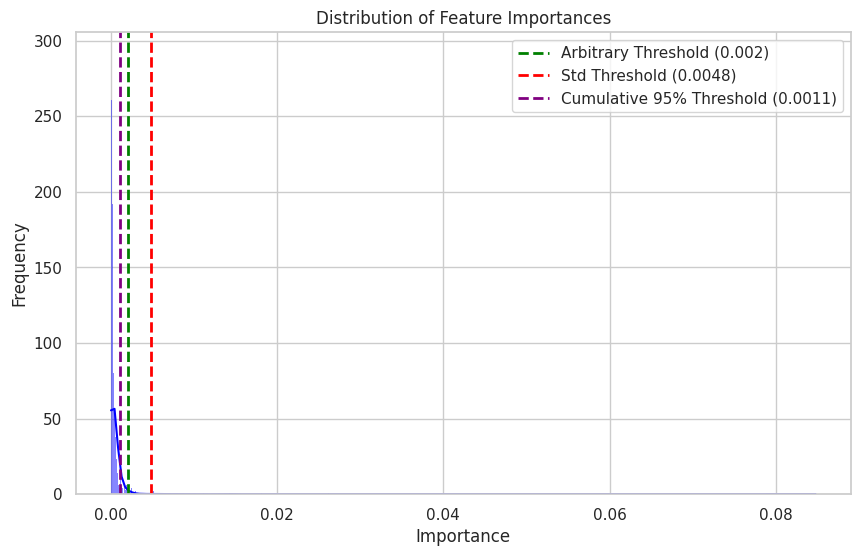

In [11]:
## Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(importances, bins=C_b, kde=True, color='blue')

# Threshold plotting
plt.axvline(threshold_arbitrary, color='green', linestyle='dashed', linewidth=2, label=f'Arbitrary Threshold ({threshold_arbitrary})')
plt.axvline(threshold_std, color='red', linestyle='dashed', linewidth=2, label=f'Std Threshold ({threshold_std:.4f})')
plt.axvline(threshold_cumulative, color='purple', linestyle='dashed', linewidth=2, label=f'Cumulative 95% Threshold ({threshold_cumulative:.4f})')

plt.title('Distribution of Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [12]:
## Select features based on different thresholds
# For demonstration, only showing the process for 'threshold of choice'
sel = SelectFromModel(estimator=rfr, prefit=True, threshold=threshold_cumulative)

# Transform the dataframes and assign new column names for binary variables
df_binary_selected = pd.DataFrame(sel.transform(df_binary), columns=[f"bin_{i}" for i in range(sel.transform(df_binary).shape[1])])
df_binarytest_selected = pd.DataFrame(sel.transform(df_binarytest), columns=[f"bin_{i}" for i in range(sel.transform(df_binarytest).shape[1])])

In [13]:
# Value from 'threshold of choice'
print("Default threshold: ", threshold_cumulative)

# Print the number of features before and after selection
print("Number of features before selection:", C_b)
print("Number of features after selection:", df_binary_selected.shape[1])
print("Number of dropped features:", C_b - df_binary_selected.shape[1])

# Features selected
features = sel.get_support()
Features_selected = np.arange(C_b)[features]
print("The features selected by 'threshold of choice' for binary variables are columns: ", Features_selected)

Default threshold:  0.0011456639988563972
Number of features before selection: 2089
Number of features after selection: 148
Number of dropped features: 1941
The features selected by 'threshold of choice' for binary variables are columns:  [   8   31   53   60  111  122  129  137  143  173  203  235  244  260
  273  283  293  305  310  319  343  399  401  412  416  429  451  462
  470  503  508  518  572  580  597  603  632  636  637  652  659  674
  684  685  743  747  772  776  810  824  828  830  836  843  848  850
  866  873  881  884  896  916  922  938  939  941  970  977  990 1009
 1011 1020 1044 1045 1049 1063 1085 1089 1096 1104 1118 1123 1124 1133
 1148 1171 1176 1204 1205 1223 1240 1242 1290 1308 1334 1354 1362 1397
 1410 1411 1440 1456 1464 1467 1477 1484 1485 1497 1532 1546 1555 1561
 1574 1598 1609 1624 1642 1644 1666 1673 1709 1732 1734 1735 1783 1796
 1798 1807 1809 1814 1823 1850 1873 1874 1875 1879 1919 1940 1949 1955
 1961 1974 2007 2026 2033 2037 2045 2079]


#### Random Forest

#### Numerical variables

In [14]:
# Assuming df_numeric and y_train are already defined
R_n, C_n = df_numeric.shape

# Train Random Forest Regressor for numerical variables
rfr_numeric = RandomForestRegressor(random_state=0)
rfr_numeric.fit(df_numeric, y_train)  # Fit the Random Forest model

RandomForestRegressor(random_state=0)

In [15]:
# Calculate importances for numerical variables
importances_numeric = rfr_numeric.feature_importances_

# Cumulative threshold preparation (uppest 95% featuers based on importances)
sorted_indices_numeric = np.argsort(importances_numeric)[::-1]
sorted_importances_numeric = importances_numeric[sorted_indices_numeric]
cumulative_importances_numeric = np.cumsum(sorted_importances_numeric)
threshold_index_numeric = np.where(cumulative_importances_numeric >= 0.5)[0][0] + 1
# Cumulative threshold
threshold_cumulative_numeric = sorted_importances_numeric[threshold_index_numeric]

# Standard deviation threshold preparation
mean_importance_numeric = np.mean(importances_numeric)
std_importance_numeric = np.std(importances_numeric)
# Standard deviation threshold
threshold_std_numeric = mean_importance_numeric + 2 * std_importance_numeric

# Arbitrary threshold
threshold_arbitrary_numeric = 0.03

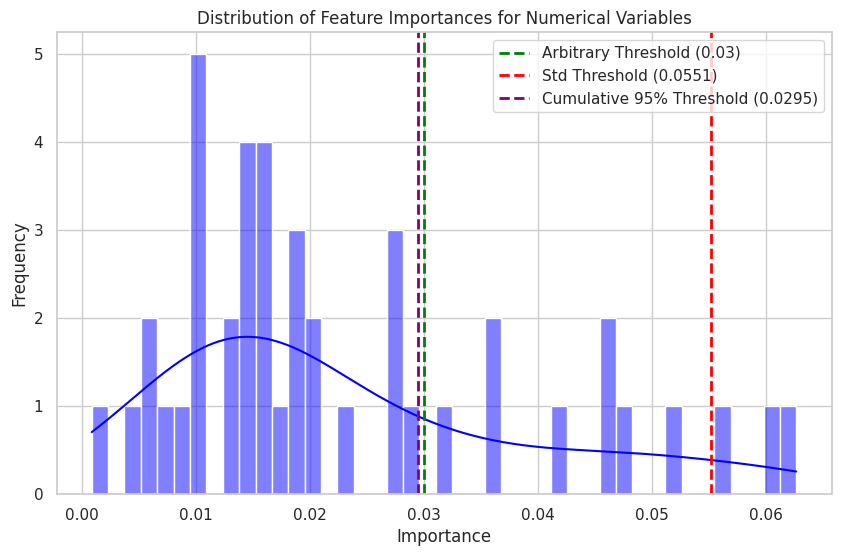

In [16]:
# Create a plot for feature importances with all thresholds for numerical variables
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(importances_numeric, bins=C_n, kde=True, color='blue')

plt.axvline(threshold_arbitrary_numeric, color='green', linestyle='dashed', linewidth=2, label=f'Arbitrary Threshold ({threshold_arbitrary_numeric})')
plt.axvline(threshold_std_numeric, color='red', linestyle='dashed', linewidth=2, label=f'Std Threshold ({threshold_std_numeric:.4f})')
plt.axvline(threshold_cumulative_numeric, color='purple', linestyle='dashed', linewidth=2, label=f'Cumulative 95% Threshold ({threshold_cumulative_numeric:.4f})')

plt.title('Distribution of Feature Importances for Numerical Variables')
plt.xlabel('Importance')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [17]:
# Select features based on the 'threshold of choice' for numerical variables
sel_numeric = SelectFromModel(estimator=rfr_numeric, prefit=True, threshold=threshold_arbitrary_numeric)

# Transform the dataframes and assign new column names for numerical variables
df_numeric_selected = pd.DataFrame(sel_numeric.transform(df_numeric), columns=[f"num_{i}" for i in range(sel_numeric.transform(df_numeric).shape[1])])
df_numerictest_selected = pd.DataFrame(sel_numeric.transform(df_numerictest), columns=[f"num_{i}" for i in range(sel_numeric.transform(df_numerictest).shape[1])])

In [18]:
# Value from 'threshold of choice'
print("Default threshold: ", threshold_arbitrary_numeric)

# Number of features before and after selection
print("Number of features before selection:", C_n)
print("Number of features after selection:", df_numeric_selected.shape[1])
print("Number of dropped features:", C_n - df_numeric_selected.shape[1])

# Features selected
features_numeric = sel_numeric.get_support()
Features_selected_numeric = np.arange(C_n)[features_numeric]
print("The features selected by 'threshold of choice' for numerical variables are columns: ", Features_selected_numeric)

Default threshold:  0.03
Number of features before selection: 43
Number of features after selection: 11
Number of dropped features: 32
The features selected by 'threshold of choice' for numerical variables are columns:  [ 4 11 25 26 27 28 29 32 37 38 41]


#### Obtaining final training and testing sets

In [19]:
# Combining numeric and binary datasets to form the final training and IVS sets
X_train_pp = pd.concat([df_numeric_selected, df_binary_selected], axis=1)
X_train_pp.head()

,num_0,num_1,num_2,num_3,num_4,num_5,num_6,num_7,num_8,num_9,num_10,bin_0,bin_1,bin_2,bin_3,bin_4,bin_5,bin_6,bin_7,bin_8,bin_9,bin_10,bin_11,bin_12,bin_13,bin_14,bin_15,bin_16,bin_17,bin_18,bin_19,bin_20,bin_21,bin_22,bin_23,bin_24,bin_25,bin_26,bin_27,bin_28,bin_29,bin_30,bin_31,bin_32,bin_33,bin_34,bin_35,bin_36,bin_37,bin_38,bin_39,bin_40,bin_41,bin_42,bin_43,bin_44,bin_45,bin_46,bin_47,bin_48,bin_49,bin_50,bin_51,bin_52,bin_53,bin_54,bin_55,bin_56,bin_57,bin_58,bin_59,bin_60,bin_61,bin_62,bin_63,bin_64,bin_65,bin_66,bin_67,bin_68,bin_69,bin_70,bin_71,bin_72,bin_73,bin_74,bin_75,bin_76,bin_77,bin_78,bin_79,bin_80,bin_81,bin_82,bin_83,bin_84,bin_85,bin_86,bin_87,bin_88,bin_89,bin_90,bin_91,bin_92,bin_93,bin_94,bin_95,bin_96,bin_97,bin_98,bin_99,bin_100,bin_101,bin_102,bin_103,bin_104,bin_105,bin_106,bin_107,bin_108,bin_109,bin_110,bin_111,bin_112,bin_113,bin_114,bin_115,bin_116,bin_117,bin_118,bin_119,bin_120,bin_121,bin_122,bin_123,bin_124,bin_125,bin_126,bin_127,bin_128,bin_129,bin_130,bin_131,bin_132,bin_133,bin_134,bin_135,bin_136,bin_137,bin_138,bin_139,bin_140,bin_141,bin_142,bin_143,bin_144,bin_145,bin_146,bin_147
0,0.246156,-0.349823,0.553459,-0.743960,0.756797,0.647663,0.580514,0.550417,0.833433,-1.376431,-0.117489,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.413306,-0.602146,0.066116,0.695693,0.012150,0.087181,0.143480,-0.118900,-0.421746,-0.047457,-0.068562,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.589590,-0.372762,-0.261014,0.180118,-0.380355,-0.413571,-0.423250,-0.450634,-0.260058,-0.085646,-0.359333,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,2.753396,0.315393,5.787216,-0.895911,5.902764,5.680784,5.785746,5.706300,5.884942,-5.623036,4.354705,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.422441,0.118777,-0.348142,-0.186814,-0.329068,-0.304466,-0.3

In [20]:
# Combining numeric and binary datasets to form the final ivs set
X_ivs_pp = pd.concat([df_numerictest_selected, df_binarytest_selected], axis=1)
X_ivs_pp.head()

,num_0,num_1,num_2,num_3,num_4,num_5,num_6,num_7,num_8,num_9,num_10,bin_0,bin_1,bin_2,bin_3,bin_4,bin_5,bin_6,bin_7,bin_8,bin_9,bin_10,bin_11,bin_12,bin_13,bin_14,bin_15,bin_16,bin_17,bin_18,bin_19,bin_20,bin_21,bin_22,bin_23,bin_24,bin_25,bin_26,bin_27,bin_28,bin_29,bin_30,bin_31,bin_32,bin_33,bin_34,bin_35,bin_36,bin_37,bin_38,bin_39,bin_40,bin_41,bin_42,bin_43,bin_44,bin_45,bin_46,bin_47,bin_48,bin_49,bin_50,bin_51,bin_52,bin_53,bin_54,bin_55,bin_56,bin_57,bin_58,bin_59,bin_60,bin_61,bin_62,bin_63,bin_64,bin_65,bin_66,bin_67,bin_68,bin_69,bin_70,bin_71,bin_72,bin_73,bin_74,bin_75,bin_76,bin_77,bin_78,bin_79,bin_80,bin_81,bin_82,bin_83,bin_84,bin_85,bin_86,bin_87,bin_88,bin_89,bin_90,bin_91,bin_92,bin_93,bin_94,bin_95,bin_96,bin_97,bin_98,bin_99,bin_100,bin_101,bin_102,bin_103,bin_104,bin_105,bin_106,bin_107,bin_108,bin_109,bin_110,bin_111,bin_112,bin_113,bin_114,bin_115,bin_116,bin_117,bin_118,bin_119,bin_120,bin_121,bin_122,bin_123,bin_124,bin_125,bin_126,bin_127,bin_128,bin_129,bin_130,bin_131,bin_132,bin_133,bin_134,bin_135,bin_136,bin_137,bin_138,bin_139,bin_140,bin_141,bin_142,bin_143,bin_144,bin_145,bin_146,bin_147
0,0.144231,1.489231,-0.438852,-0.862395,-0.562672,-0.499623,-0.585592,-1.113933,-1.032614,1.057215,0.439453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.326539,0.814691,-0.503080,0.588317,-0.422622,-0.332588,-0.240711,0.471707,-0.048087,0.827113,-0.639395,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.144231,0.373174,0.830766,0.907772,0.892429,1.039920,1.147561,1.005447,0.917599,-0.199496,0.991368,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0.850386,0.256860,-0.511109,2.235528,0.817126,0.833708,1.474460,0.170395,0.097571,-0.140304,1.620226,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.615001,0.201473,0.458556,0.154312,0.302266,0.281165,0.309684,0.08

# Model Evaluation

## Defining Functions for each Model Type

### Function for Linear Regressor

In [46]:
from sklearn.linear_model import Ridge

def ridge_cv(X, y, n_splits=5, param_grid=None):
    """
    Performs a grid search with cross-validation for a Ridge regression model.

    Parameters:
    X: DataFrame
        Feature matrix.
    y: Series or array-like
        Target variable.
    n_splits: int, default=5
        Number of folds for k-fold cross-validation.
    param_grid: dict, default=None
        Dictionary with parameters names (str) as keys and lists of parameter settings to try as values.
        If None, a default parameter grid is used.

    Returns:
    GridSearchCV object
        Fitted GridSearchCV object.
    """

    # Use default hyperparameters if none are provided
    if param_grid is None:
        param_grid = {
            'alpha': [0.001, 0.01, 0.1, 1, 10]  # Regularization strength
        }

    # Initialize Ridge regression
    ridge = Ridge()

    # Set up k-fold cross-validation
    kf = KFold(n_splits=n_splits)

    # Configure and initiate GridSearchCV
    grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=kf,
                               scoring='neg_mean_squared_error', n_jobs=-1)

    # Perform grid search
    grid_search.fit(X, y)

    # Access and print results
    results_rr = grid_search.cv_results_
    print("\nGrid Search Results:")
    for i in range(len(results_rr['params'])):
        params = results_rr['params'][i]
        mean_score = results_rr['mean_test_score'][i]
        std_score = results_rr['std_test_score'][i]
        print(f"Parameters: {params} -> Mean Score: {mean_score:.4f} (Std: {std_score * 2:.4f})")
        print(f"Parameters: {results_rr['params'][i]} -> Rank: {results_rr['rank_test_score'][i]}")

    # Return the fitted GridSearchCV object
    return grid_search

### Function for Random Forest (**RF**) Regressor

In [52]:
def rf_cv(X, y, n_splits=5, param_grid=None):

    # Use default hyperparameters if none are provided
    if param_grid is None:
        param_grid = {
            'n_estimators': [50, 100],  # Number of trees in the forest
            'max_depth': [10, 20, 30]        # Maximum depth of each tree
        }

    # Initialize RandomForestRegressor
    rf = RandomForestRegressor()

    # Set up k-fold cross-validation
    kf = KFold(n_splits=n_splits)

    # Configure and initiate GridSearchCV
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=kf,
                               scoring='neg_mean_squared_error', n_jobs=-1)

    # Perform grid search
    grid_search.fit(X, y)

    # Access and print results
    results_rf = grid_search.cv_results_
    print("\nGrid Search Results:")
    for i in range(len(results_rf['params'])):
        params = results_rf['params'][i]
        mean_score = results_rf['mean_test_score'][i]
        std_score = results_rf['std_test_score'][i]
        print(f"Parameters: {params} -> Mean Score: {mean_score:.4f} (Std: {std_score * 2:.4f})")
        print(f"Parameters: {results_rf['params'][i]} -> Rank: {results_rf['rank_test_score'][i]}")

    # Return the fitted GridSearchCV object
    return grid_search

### Function for XGBoost (**XGB**) Regressor

In [77]:
def xgboost_cv(X, y, n_splits=5, param_grid=None):

    # Use default hyperparameters if none are provided
    if param_grid is None:
        param_grid = {
            'n_estimators': [50, 100],  # Number of boosting rounds
            'max_depth': [3, 6, 10]         # Maximum depth of a tree
        }

    # Initialize XGBRegressor
    xgb = XGBRegressor()

    # Set up k-fold cross-validation
    kf = KFold(n_splits=n_splits)

    # Configure and initiate GridSearchCV
    grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=kf,
                               scoring='neg_mean_squared_error', n_jobs=-1)

    # Perform grid search
    grid_search.fit(X, y)

    # Access and print results
    results_xgb = grid_search.cv_results_
    print("\nGrid Search Results:")
    for i in range(len(results_xgb['params'])):
        params = results_xgb['params'][i]
        mean_score = results_xgb['mean_test_score'][i]
        std_score = results_xgb['std_test_score'][i]
        print(f"Parameters: {params} -> Mean Score: {mean_score:.4f} (Std: {std_score * 2:.4f})")
        print(f"Parameters: {results_xgb['params'][i]} -> Rank: {results_xgb['rank_test_score'][i]}")

    # Return the fitted GridSearchCV object
    return grid_search

### Function for Support Vector Machine (**SVM**) Regressor

In [60]:
def svm_cv(X, y, n_splits=5, param_grid=None):

    # Use default hyperparameters if none are provided
    if param_grid is None:
        param_grid = {
            'kernel': ['rbf', 'linear'] # Specifies the kernel type
        }

    # Initialize SVR
    svr = SVR()

    # Set up k-fold cross-validation
    kf = KFold(n_splits=n_splits)

    # Configure and initiate GridSearchCV
    grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=kf,
                               scoring='neg_mean_squared_error', n_jobs=-1)

    # Perform grid search
    grid_search.fit(X, y)

    # Access and print results
    results_svr = grid_search.cv_results_
    print("\nGrid Search Results:")
    for i in range(len(results_svr['params'])):
        params = results_svr['params'][i]
        mean_score = results_svr['mean_test_score'][i]
        std_score = results_svr['std_test_score'][i]
        print(f"Parameters: {params} -> Mean Score: {mean_score:.4f} (Std: {std_score * 2:.4f})")
        print(f"Parameters: {results_svr['params'][i]} -> Rank: {results_svr['rank_test_score'][i]}")

    # Return the fitted GridSearchCV object
    return grid_search

### Function for Neural Network (NN) Regressor

In [80]:
def mlp_cv(X, y, n_splits=5, param_grid=None):

    # Use default hyperparameters if none are provided
    if param_grid is None:
        param_grid = {
            'learning_rate_init': [0.1, 0.01],
            'max_iter': [50, 150]
        }

    # Initialize MLPRegressor
    mlp = MLPRegressor(solver="sgd")

    # Set up k-fold cross-validation
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=23)

    # Configure and initiate GridSearchCV
    grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=kf,
                               scoring='neg_mean_squared_error', n_jobs=-1)

    # Perform grid search
    if isinstance(y, pd.DataFrame) or isinstance(y, pd.Series):
        y = y.values.ravel()  # Convert to numpy array if y is a DataFrame or Series
    grid_search.fit(X, y)

    # Access and print results
    results_mlp = grid_search.cv_results_
    print("\nGrid Search Results:")
    for i in range(len(results_mlp['params'])):
        params = results_mlp['params'][i]
        mean_score = results_mlp['mean_test_score'][i]
        std_score = results_mlp['std_test_score'][i]
        print(f"Parameters: {params} -> Mean Score: {mean_score:.4f} (Std: {std_score * 2:.4f})")
        print(f"Parameters: {results_mlp['params'][i]} -> Rank: {results_mlp['rank_test_score'][i]}")  # Corrected line

    # Return the fitted GridSearchCV object
    return grid_search


## Applying Model Type Functions

### Applying Linear Regressor Function

In [54]:
ridge_results = ridge_cv(X_train_pp, y_train)


Grid Search Results:
Parameters: {'alpha': 0.001} -> Mean Score: -0.0435 (Std: 0.0021)
Parameters: {'alpha': 0.001} -> Rank: 5
Parameters: {'alpha': 0.01} -> Mean Score: -0.0435 (Std: 0.0021)
Parameters: {'alpha': 0.01} -> Rank: 4
Parameters: {'alpha': 0.1} -> Mean Score: -0.0435 (Std: 0.0021)
Parameters: {'alpha': 0.1} -> Rank: 3
Parameters: {'alpha': 1} -> Mean Score: -0.0435 (Std: 0.0021)
Parameters: {'alpha': 1} -> Rank: 2
Parameters: {'alpha': 10} -> Mean Score: -0.0434 (Std: 0.0022)
Parameters: {'alpha': 10} -> Rank: 1


### Applying **RF** Regressor Function

In [55]:
rf_results = rf_cv(X_train_pp, y_train)


Grid Search Results:
Parameters: {'max_depth': 10, 'n_estimators': 50} -> Mean Score: -0.0382 (Std: 0.0021)
Parameters: {'max_depth': 10, 'n_estimators': 50} -> Rank: 6
Parameters: {'max_depth': 10, 'n_estimators': 100} -> Mean Score: -0.0379 (Std: 0.0020)
Parameters: {'max_depth': 10, 'n_estimators': 100} -> Rank: 5
Parameters: {'max_depth': 20, 'n_estimators': 50} -> Mean Score: -0.0295 (Std: 0.0014)
Parameters: {'max_depth': 20, 'n_estimators': 50} -> Rank: 3
Parameters: {'max_depth': 20, 'n_estimators': 100} -> Mean Score: -0.0295 (Std: 0.0015)
Parameters: {'max_depth': 20, 'n_estimators': 100} -> Rank: 4
Parameters: {'max_depth': 30, 'n_estimators': 50} -> Mean Score: -0.0289 (Std: 0.0014)
Parameters: {'max_depth': 30, 'n_estimators': 50} -> Rank: 2
Parameters: {'max_depth': 30, 'n_estimators': 100} -> Mean Score: -0.0285 (Std: 0.0013)
Parameters: {'max_depth': 30, 'n_estimators': 100} -> Rank: 1


### Applying **XGB** Regressor Function

In [78]:
xgb_results = xgboost_cv(X_train_pp, y_train) # uses hyperparameters defined in the function


Grid Search Results:
Parameters: {'max_depth': 3, 'n_estimators': 50} -> Mean Score: -0.0379 (Std: 0.0013)
Parameters: {'max_depth': 3, 'n_estimators': 50} -> Rank: 6
Parameters: {'max_depth': 3, 'n_estimators': 100} -> Mean Score: -0.0341 (Std: 0.0017)
Parameters: {'max_depth': 3, 'n_estimators': 100} -> Rank: 5
Parameters: {'max_depth': 6, 'n_estimators': 50} -> Mean Score: -0.0309 (Std: 0.0028)
Parameters: {'max_depth': 6, 'n_estimators': 50} -> Rank: 4
Parameters: {'max_depth': 6, 'n_estimators': 100} -> Mean Score: -0.0301 (Std: 0.0029)
Parameters: {'max_depth': 6, 'n_estimators': 100} -> Rank: 3
Parameters: {'max_depth': 10, 'n_estimators': 50} -> Mean Score: -0.0297 (Std: 0.0015)
Parameters: {'max_depth': 10, 'n_estimators': 50} -> Rank: 1
Parameters: {'max_depth': 10, 'n_estimators': 100} -> Mean Score: -0.0300 (Std: 0.0015)
Parameters: {'max_depth': 10, 'n_estimators': 100} -> Rank: 2


### Applying **SVM** Regressor Function

In [61]:
svm_results = svm_cv(X_train_pp, y_train) # uses hyperparameters defined in the function


Grid Search Results:
Parameters: {'kernel': 'rbf'} -> Mean Score: -0.0271 (Std: 0.0021)
Parameters: {'kernel': 'rbf'} -> Rank: 1
Parameters: {'kernel': 'linear'} -> Mean Score: -0.0441 (Std: 0.0024)
Parameters: {'kernel': 'linear'} -> Rank: 2


### Applying **NN** Regressor Function

In [81]:
mlp_results = mlp_cv(X_train_pp, y_train)


Grid Search Results:
Parameters: {'learning_rate_init': 0.1, 'max_iter': 50} -> Mean Score: -0.0359 (Std: 0.0047)
Parameters: {'learning_rate_init': 0.1, 'max_iter': 50} -> Rank: 1
Parameters: {'learning_rate_init': 0.1, 'max_iter': 150} -> Mean Score: -0.0381 (Std: 0.0050)
Parameters: {'learning_rate_init': 0.1, 'max_iter': 150} -> Rank: 2
Parameters: {'learning_rate_init': 0.01, 'max_iter': 50} -> Mean Score: -0.0395 (Std: 0.0013)
Parameters: {'learning_rate_init': 0.01, 'max_iter': 50} -> Rank: 4
Parameters: {'learning_rate_init': 0.01, 'max_iter': 150} -> Mean Score: -0.0387 (Std: 0.0034)
Parameters: {'learning_rate_init': 0.01, 'max_iter': 150} -> Rank: 3


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


## Plotting Model Type GridSearchCV Results

-0.043 (+/-0.002) for {'alpha': 0.001}
-0.043 (+/-0.002) for {'alpha': 0.01}
-0.043 (+/-0.002) for {'alpha': 0.1}
-0.043 (+/-0.002) for {'alpha': 1}
-0.043 (+/-0.002) for {'alpha': 10}

----------------------------------------



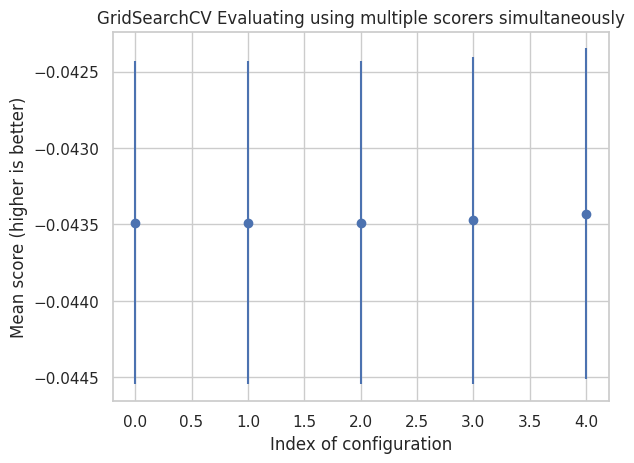

-0.038 (+/-0.002) for {'max_depth': 10, 'n_estimators': 50}
-0.038 (+/-0.002) for {'max_depth': 10, 'n_estimators': 100}
-0.030 (+/-0.001) for {'max_depth': 20, 'n_estimators': 50}
-0.030 (+/-0.002) for {'max_depth': 20, 'n_estimators': 100}
-0.029 (+/-0.001) for {'max_depth': 30, 'n_estimators': 50}
-0.029 (+/-0.001) for {'max_depth': 30, 'n_estimators': 100}

----------------------------------------



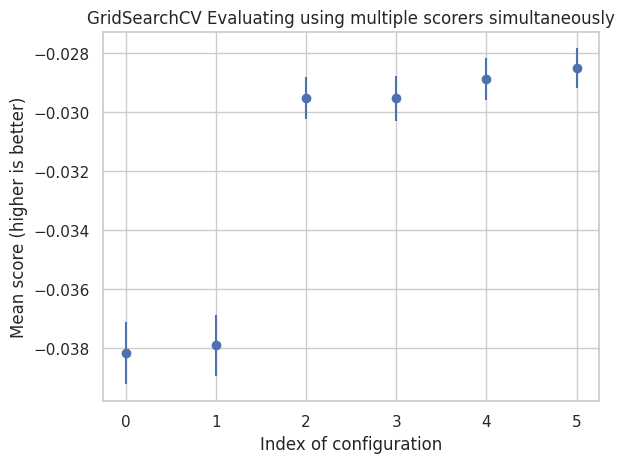

-0.038 (+/-0.001) for {'max_depth': 3, 'n_estimators': 50}
-0.034 (+/-0.002) for {'max_depth': 3, 'n_estimators': 100}
-0.031 (+/-0.003) for {'max_depth': 6, 'n_estimators': 50}
-0.030 (+/-0.003) for {'max_depth': 6, 'n_estimators': 100}
-0.030 (+/-0.001) for {'max_depth': 10, 'n_estimators': 50}
-0.030 (+/-0.001) for {'max_depth': 10, 'n_estimators': 100}

----------------------------------------



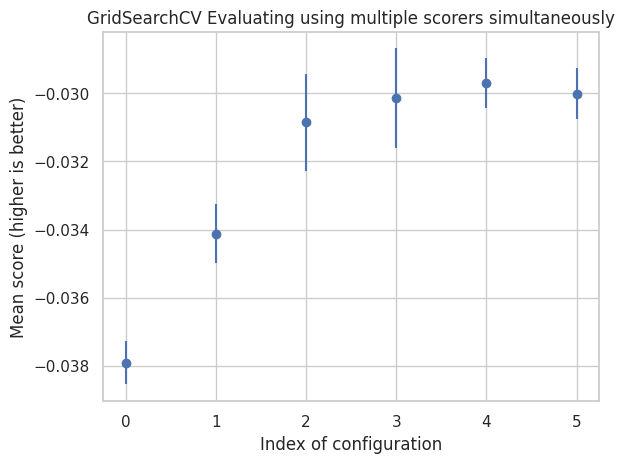

-0.027 (+/-0.002) for {'kernel': 'rbf'}
-0.044 (+/-0.002) for {'kernel': 'linear'}

----------------------------------------



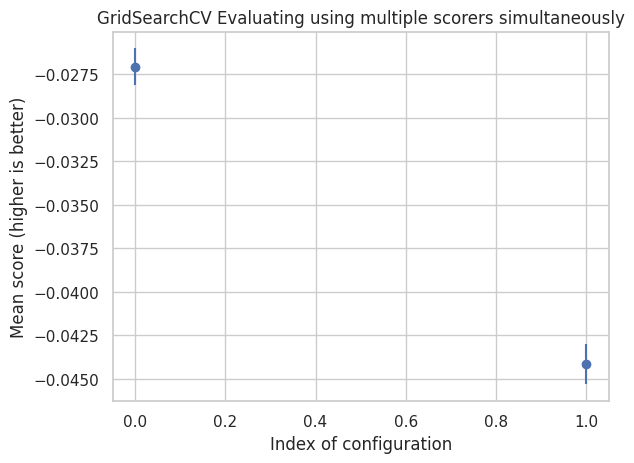

-0.036 (+/-0.005) for {'learning_rate_init': 0.1, 'max_iter': 50}
-0.038 (+/-0.005) for {'learning_rate_init': 0.1, 'max_iter': 150}
-0.039 (+/-0.001) for {'learning_rate_init': 0.01, 'max_iter': 50}
-0.039 (+/-0.003) for {'learning_rate_init': 0.01, 'max_iter': 150}

----------------------------------------



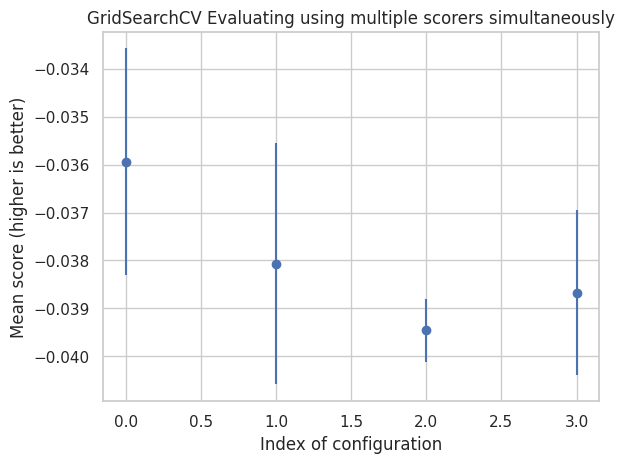

In [83]:
import matplotlib.pyplot as plt

def plot_results(grid_search):
    means = grid_search.cv_results_['mean_test_score']
    stds = grid_search.cv_results_['std_test_score']
    params = grid_search.cv_results_['params']

    for mean, std, params in zip(means, stds, params):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print("\n" + "-"*40 + "\n")  # Separator line with space

    plt.errorbar(range(len(means)), means, yerr=stds, fmt='o')
    plt.title("GridSearchCV Evaluating using multiple scorers simultaneously")
    plt.xlabel("Index of configuration")
    plt.ylabel("Mean score (higher is better)")
    plt.show()

# Example usage
plot_results(ridge_results)
plot_results(rf_results)
plot_results(xgb_results)
plot_results(svm_results)
plot_results(mlp_results)

In [84]:
def evaluate_model(model, X, y, n_splits=5, random_state=42):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
    mse_scores = cross_val_score(model, X, y, cv=kf, scoring=mse_scorer)
    return -mse_scores.mean()  # Negate to get positive value

In [85]:
# Make sure all these lines have been executed and the grid searches have been performed
best_ridge = ridge_results.best_estimator_  # Assuming ridge_results is defined from previous Ridge grid search
best_rf = rf_results.best_estimator_        # Assuming rf_results is defined from previous RF grid search
best_xgb = xgb_results.best_estimator_      # ... and so on for other models
best_svm = svm_results.best_estimator_
best_mlp = mlp_results.best_estimator_

# Now evaluate each model
mean_mse_ridge = evaluate_model(best_ridge, X_train_pp, y_train)
mean_mse_rf = evaluate_model(best_rf, X_train_pp, y_train)
mean_mse_xgb = evaluate_model(best_xgb, X_train_pp, y_train)
mean_mse_svm = evaluate_model(best_svm, X_train_pp, y_train)
mean_mse_mlp = evaluate_model(best_mlp, X_train_pp, y_train)

# Print the mean MSE for each model
print(f"Mean MSE for Ridge: {mean_mse_ridge}")
print(f"Mean MSE for Random Forest: {mean_mse_rf}")
print(f"Mean MSE for XGBoost: {mean_mse_xgb}")
print(f"Mean MSE for SVM: {mean_mse_svm}")
print(f"Mean MSE for MLP: {mean_mse_mlp}")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Mean MSE for Ridge: 0.0431318608877546
Mean MSE for Random Forest: 0.02856838335625598
Mean MSE for XGBoost: 0.030296248610638937
Mean MSE for SVM: 0.026829982050416236
Mean MSE for MLP: 0.0349216272411922


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


In [88]:
# Select the best model based on MCC
best_model = max([(mean_mse_ridge, best_ridge),
                  (mean_mse_rf, best_rf),
                  (mean_mse_xgb, best_xgb),
                  (mean_mse_svm, best_svm),
                  (mean_mse_mlp, best_mlp)], key=lambda x: x[0])[1]

# Display the type and hyperparameters of the best model
model_type = type(best_model).__name__
model_params = best_model.get_params()
print(f"Best Model: {model_type}")
print("Hyperparameters:", model_params)

# Predict using the best model
y_preds = best_model.predict(X_ivs_pp)

Best Model: Ridge
Hyperparameters: {'alpha': 10, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.0001}


In [87]:
# Name of the file
filename = "30.txt"

# Creating the file
with open(filename, 'w') as file:
    for pred in y_preds:
        file.write(f' {pred:.3f}\n')

from google.colab import files

files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>